In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


1. Generate summary statistics.

In [27]:
df.shape

(891, 12)

In [28]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
df["Age"]=df["Age"].fillna(df["Age"].mean())
df["Cabin"]=df["Cabin"].fillna("No cabin")
df["Embarked"]=df["Embarked"].fillna("NAN")

In [32]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [33]:
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [34]:
df['Embarked']=df['Embarked'].fillna("S")
df=pd.get_dummies(df,columns=['Embarked'], drop_first=True)

In [35]:
df=df.drop(['Name','Ticket','Cabin'],axis=1)

In [36]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_NAN,Embarked_Q,Embarked_S
0,1,0,3,0,22.000000,1,0,7.2500,False,False,True
1,2,1,1,1,38.000000,1,0,71.2833,False,False,False
2,3,1,3,1,26.000000,0,0,7.9250,False,False,True
3,4,1,1,1,35.000000,1,0,53.1000,False,False,True
4,5,0,3,0,35.000000,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,False,False,True
887,888,1,1,1,19.000000,0,0,30.0000,False,False,True
888,889,0,3,1,29.699118,1,2,23.4500,False,False,True
889,890,1,1,0,26.000000,0,0,30.0000,False,False,False


2.Create histograms and boxplots for numeric features

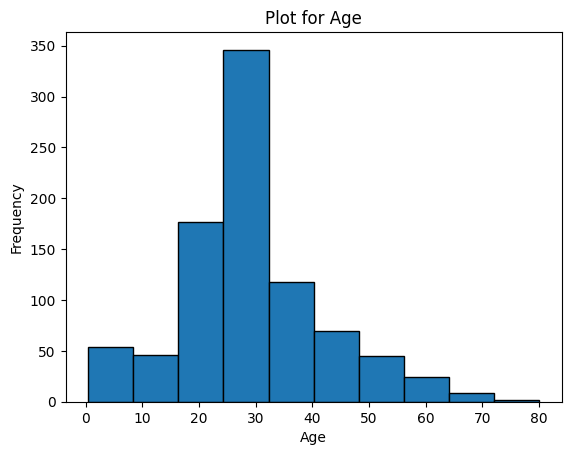

In [45]:
df['Age'].plot(kind='hist',edgecolor='black')
plt.title("Plot for Age")
plt.xlabel("Age")
plt.show()

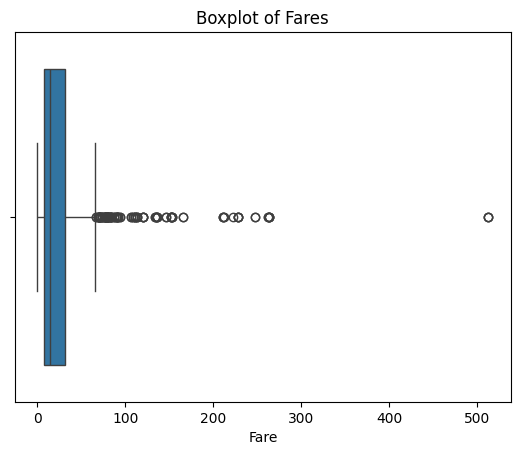

In [44]:
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fares")
plt.show()

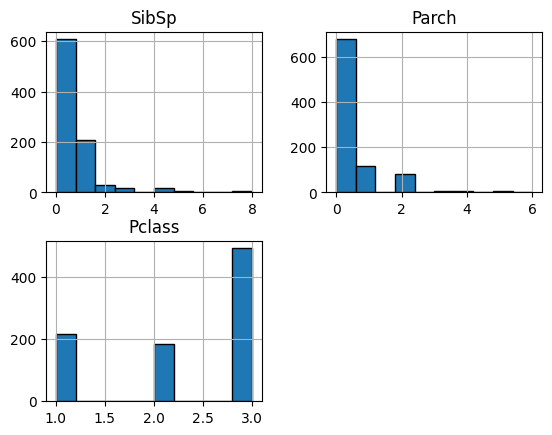

In [49]:
df[['SibSp','Parch','Pclass']].hist(edgecolor='black')
plt.show()

3. Use pairplot/correlation matrix for feature relationships.

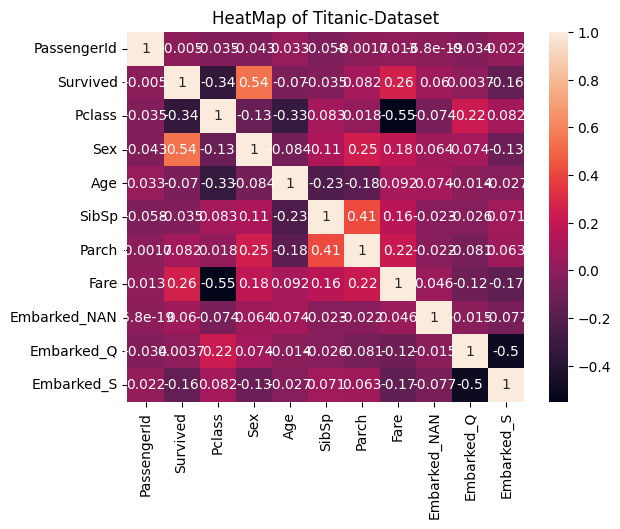

In [53]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)
plt.title("HeatMap of Titanic-Dataset")
plt.show()

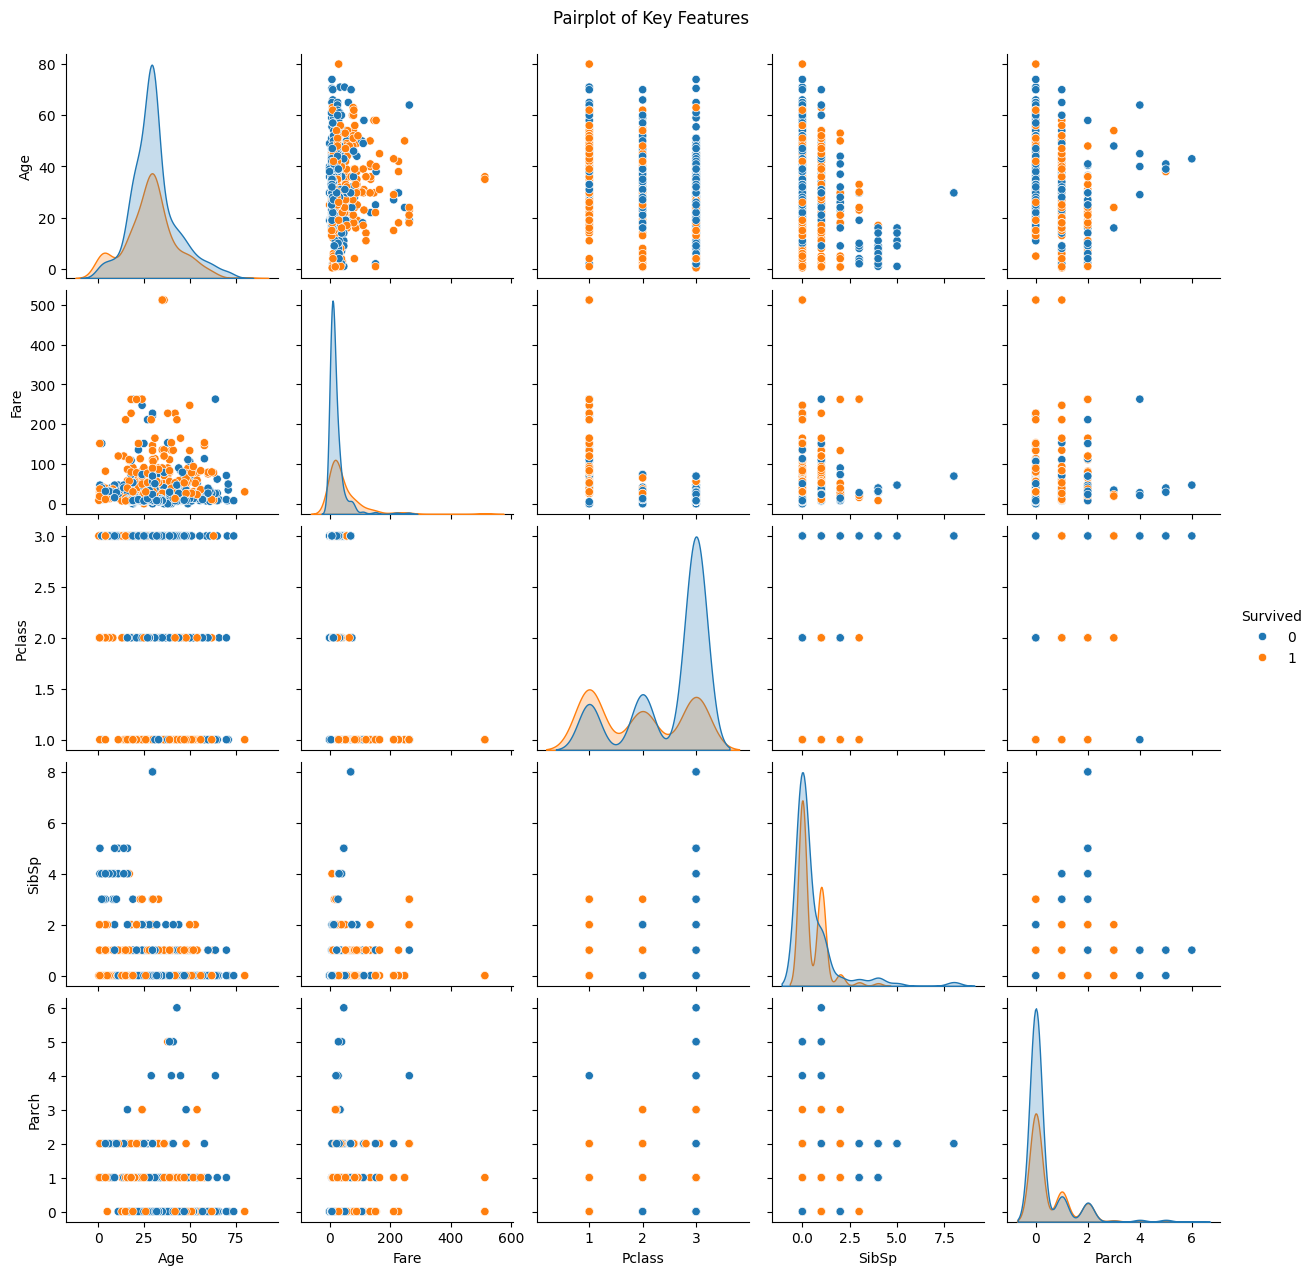

In [55]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch']], hue='Survived')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

4. Identify patterns, trends, or anomalies in the data.

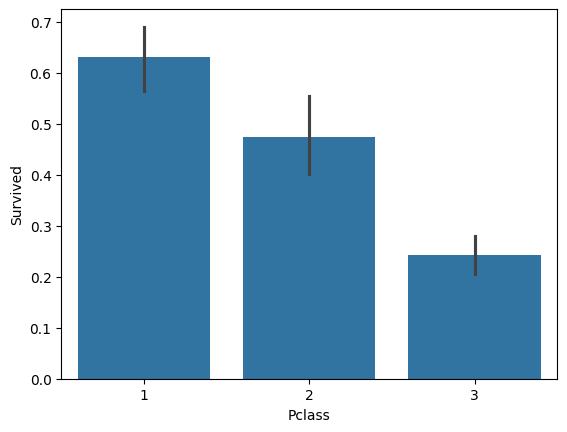

In [58]:
sns.barplot(data=df,x='Pclass',y='Survived')
plt.show()

In [70]:
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 80], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61+'])

In [73]:
age_counts = df.groupby('AgeBin')['Survived'].sum().reset_index()
age_counts

C:\Users\Welcome\AppData\Local\Temp\ipykernel_12640\3504285213.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = df.groupby('AgeBin')['Survived'].sum().reset_index()


,AgeBin,Survived
0,0-10,38
1,11-20,44
2,21-30,136
3,31-40,69
4,41-50,33
5,51-60,17
6,61+,5


In [83]:
age_survival = df.groupby('AgeBin')['Survived'].mean().reset_index()
age_survival

C:\Users\Welcome\AppData\Local\Temp\ipykernel_12640\2523387463.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('AgeBin')['Survived'].mean().reset_index()


,AgeBin,Survived
0,0-10,0.593750
1,11-20,0.382609
2,21-30,0.334152
3,31-40,0.445161
4,41-50,0.383721
5,51-60,0.404762
6,61+,0.227273


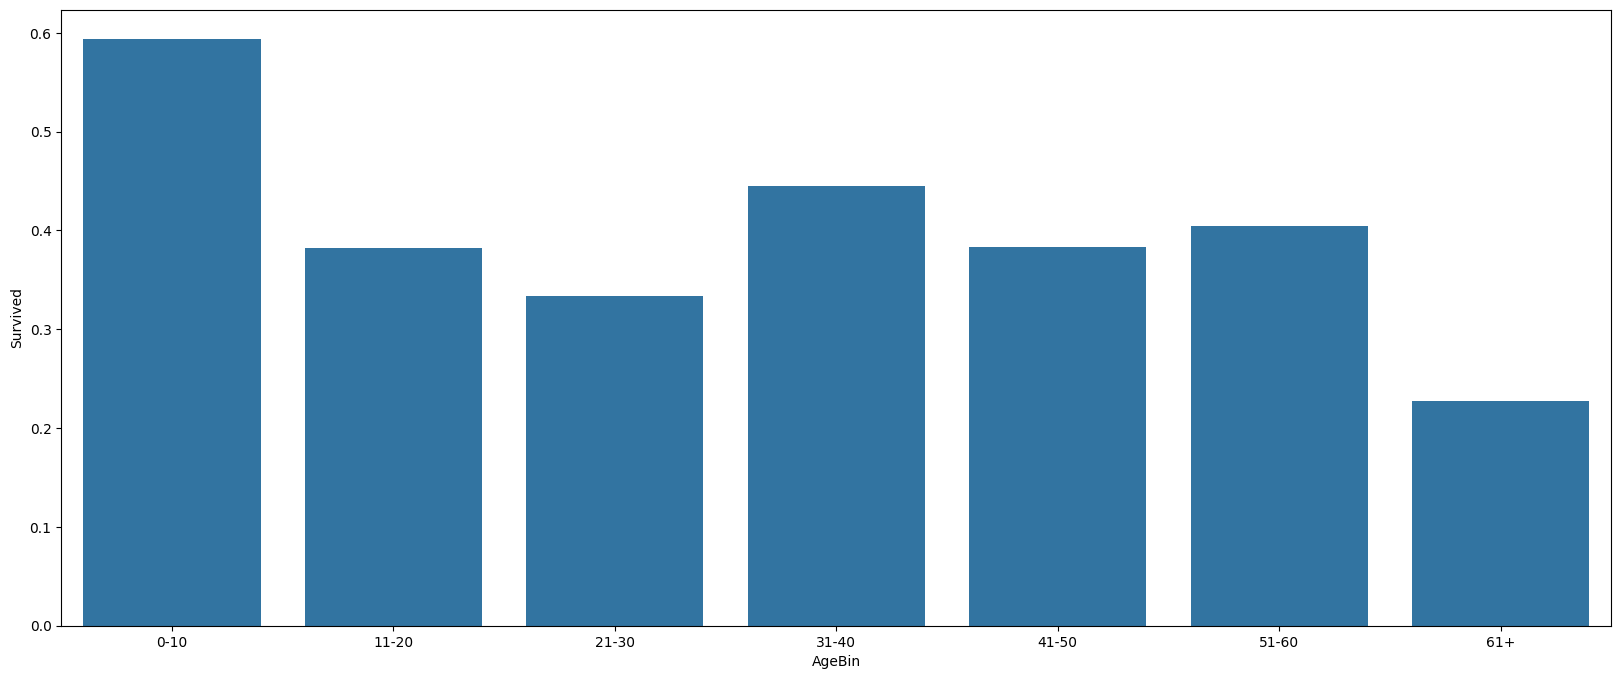

In [84]:
plt.figure(figsize=(20, 8)) 
sns.barplot(data=age_survival, x='AgeBin', y='Survived')
plt.show()

5.Make basic feature-level inferences from visuals

In [87]:
print(df.groupby('Pclass')['Survived'].mean())
print(df.groupby('Sex')['Survived'].mean())
print(df.groupby('SibSp')['Survived'].mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64
